In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('project1_df.csv')

df.head(3)

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location
0,943146,5876328741,Female,25-45,30/08/2023 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,661.004000,Credit Card,Ahmedabad
1,180079,1018503182,Male,25-45,23/02/2024 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,4463.801875,Credit Card,Bangalore
2,337580,3814082218,Other,60 and above,06/03/2022 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,1774.832575,Credit Card,Delhi


### Exploratory Data Analysis

In [31]:
df.tail(2)

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location
54998,982183,5032564481,Female,45-60,05/08/2020 23:57:56,Beauty and Health,Yes,SEASONALOFFER21,204.56,3977.4735,3772.9135,Credit Card,Kolkata
54999,126691,9172953722,Male,25-45,21/07/2022 09:05:18,Beauty and Health,Yes,NEWYEARS,380.81,3703.5819,3322.7719,Credit Card,Mumbai


In [32]:
df.sample(2)

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location
28846,106319,1245715162,Other,45-60,22/09/2022 11:33:12,Beauty and Health,No,NaN,0.00,2334.230325,2334.230325,Credit Card,Delhi
28688,606222,1053241162,Female,18-25,26/03/2022 08:56:01,Beauty and Health,Yes,SAVE10,265.99,4101.299625,3835.309625,International Card,Hyderabad


In [33]:
df.shape

(55000, 13)

In [34]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CID                    55000 non-null  int64  
 1   TID                    55000 non-null  int64  
 2   Gender                 55000 non-null  str    
 3   Age Group              55000 non-null  str    
 4   Purchase Date          55000 non-null  str    
 5   Product Category       55000 non-null  str    
 6   Discount Availed       55000 non-null  str    
 7   Discount Name          27415 non-null  str    
 8   Discount Amount (INR)  55000 non-null  float64
 9   Gross Amount           55000 non-null  float64
 10  Net Amount             55000 non-null  float64
 11  Purchase Method        55000 non-null  str    
 12  Location               55000 non-null  str    
dtypes: float64(3), int64(2), str(8)
memory usage: 5.5 MB


In [35]:
df.describe()

,CID,TID,Discount Amount (INR),Gross Amount,Net Amount
count,55000.000000,5.500000e+04,55000.000000,55000.000000,55000.000000
mean,551245.593891,5.504740e+09,136.986796,3012.936606,2875.949810
std,260603.330337,2.594534e+09,165.375502,1718.431066,1726.127778
min,100009.000000,1.000163e+09,0.000000,136.454325,-351.119775
25%,323717.000000,3.252604e+09,0.000000,1562.111325,1429.551863
50%,550088.500000,5.498383e+09,0.000000,2954.266150,2814.910875
75%,776955.750000,7.747933e+09,274.115000,4342.221675,4211.407838
max,999996.000000,9.999393e+09,500.000000,8394.825600,8394.825600


In [36]:
df.columns

Index(['CID', 'TID', 'Gender', 'Age Group', 'Purchase Date',
       'Product Category', 'Discount Availed', 'Discount Name',
       'Discount Amount (INR)', 'Gross Amount', 'Net Amount',
       'Purchase Method', 'Location'],
      dtype='str')

In [37]:
df['Product Category'].value_counts()

Product Category
Electronics          16574
Clothing             10968
Beauty and Health     8332
Sports & Fitness      5557
Home & Kitchen        5489
Books                 2762
Other                 2171
Pet Care              1618
Toys & Games          1529
Name: count, dtype: int64

In [38]:
df['Discount Name'].unique()

<StringArray>
['FESTIVE50', 'SEASONALOFFER21', nan, 'WELCOME5', 'SAVE10', 'NEWYEARS']
Length: 6, dtype: str

In [39]:
df['Net Amount'].min(), df['Net Amount'].max(), df['Net Amount'].mean()

(np.float64(-351.119775), np.float64(8394.8256), np.float64(2875.949810155))

In [40]:
df['Gross Amount'].min(), df['Gross Amount'].max(), df['Gross Amount'].mean()

(np.float64(136.45432499999998),
 np.float64(8394.8256),
 np.float64(3012.936605973182))

#### Data Cleaning

In [41]:
df.isnull().sum() # Пошук пропущених значень

CID                          0
TID                          0
Gender                       0
Age Group                    0
Purchase Date                0
Product Category             0
Discount Availed             0
Discount Name            27585
Discount Amount (INR)        0
Gross Amount                 0
Net Amount                   0
Purchase Method              0
Location                     0
dtype: int64

In [42]:
df['Discount Name'] = df['Discount Name'].fillna('No Discount') # Обробка: заповнення пропущених значень

In [43]:
df.isnull().sum()

CID                      0
TID                      0
Gender                   0
Age Group                0
Purchase Date            0
Product Category         0
Discount Availed         0
Discount Name            0
Discount Amount (INR)    0
Gross Amount             0
Net Amount               0
Purchase Method          0
Location                 0
dtype: int64

In [44]:
df.duplicated().sum() # Пошук дублікатів

np.int64(0)

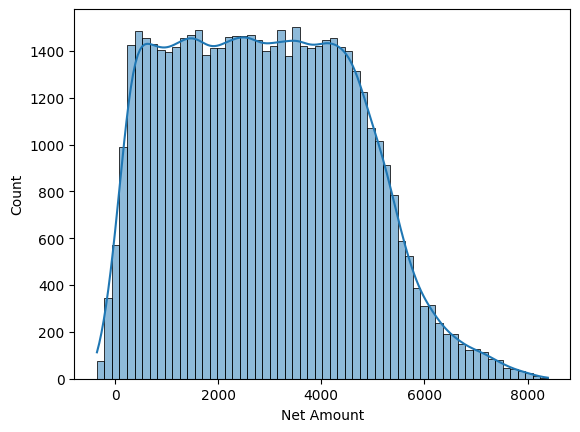

In [45]:
# Розподіл даних

sns.histplot(df['Net Amount'], kde=True)
plt.show()

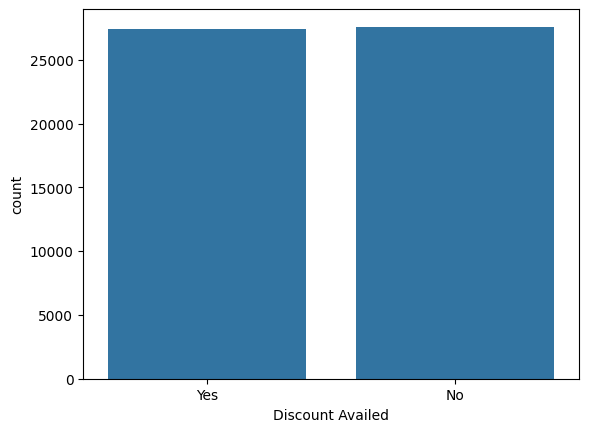

In [46]:
# Частка покупок зі знижкою

sns.countplot(x='Discount Availed', data=df)
plt.show()

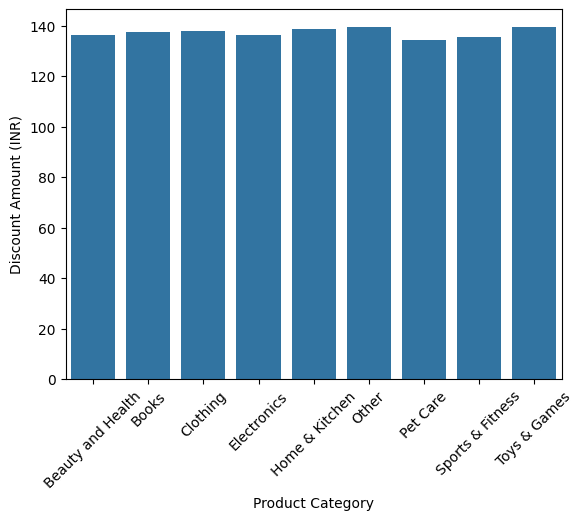

In [47]:
# Середня знижка по категоріях

avg_discount = df.groupby('Product Category')['Discount Amount (INR)'].mean().reset_index()

sns.barplot(x='Product Category', y='Discount Amount (INR)', data=avg_discount)
plt.xticks(rotation=45)
plt.show()

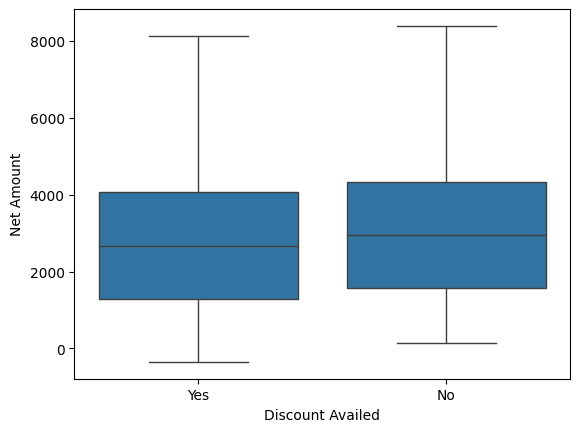

In [48]:
# Виявлення аномалій

sns.boxplot(x='Discount Availed', y='Net Amount', data=df)
plt.show()

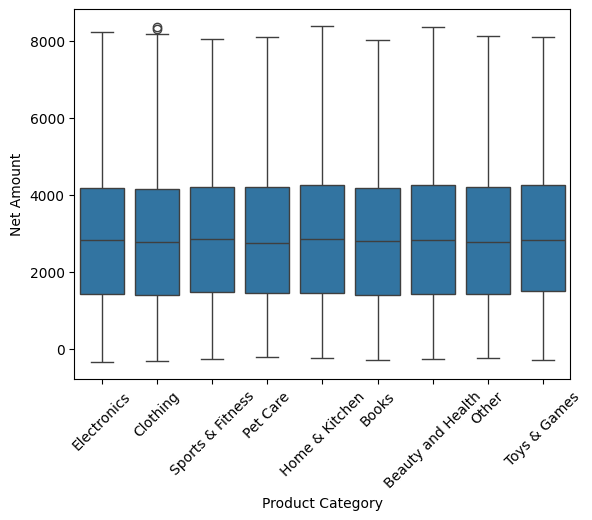

In [49]:
sns.boxplot(x='Product Category', y='Net Amount', data=df)
plt.xticks(rotation=45)
plt.show()

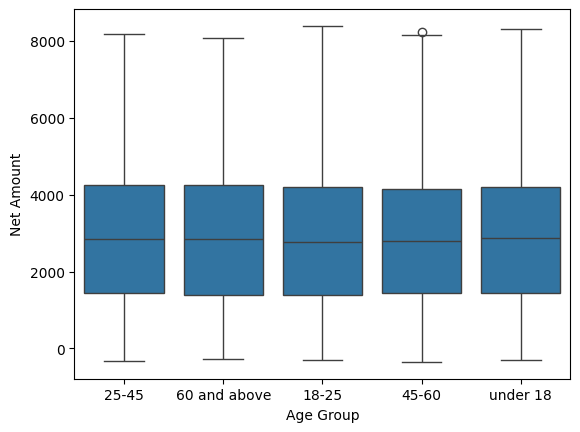

In [50]:
sns.boxplot(x='Age Group', y='Net Amount', data=df)
plt.show()

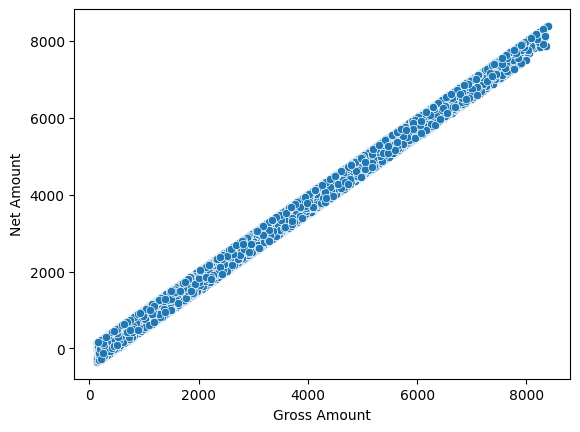

In [51]:
sns.scatterplot(x='Gross Amount', y='Net Amount', data=df)
plt.show()

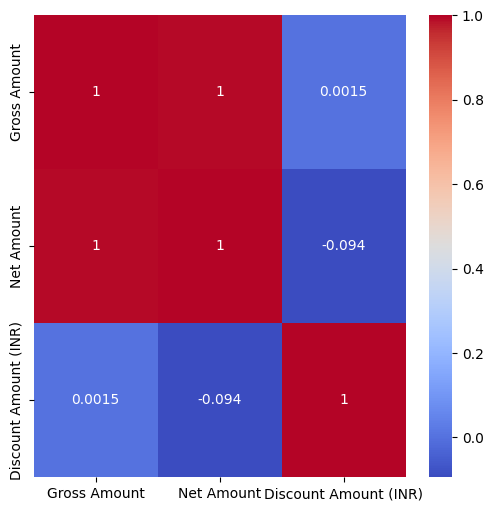

In [52]:
# Кореляційний аналіз

correlation = df[['Gross Amount','Net Amount','Discount Amount (INR)']].corr()

plt.figure(figsize = (6,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

### Train-Test split 

In [3]:
df['Age Group'].unique()

<StringArray>
['25-45', '60 and above', '18-25', '45-60', 'under 18']
Length: 5, dtype: str

In [16]:
def convert_age(x):
    if '-' in x:                     # 25-45
        low, high = x.split('-')
        return (int(low) + int(high)) / 2
    
    elif 'under' in x:               # under 18
        return 13                    # приблизна середина (0-18)
    
    elif 'above' in x:               # 60 and above
        return 70                    # приблизне середнє (60-80)
    
    else:
        return None

df['Age'] = df['Age Group'].apply(convert_age)

In [17]:
df.head()

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location,Age
0,943146,5876328741,Female,25-45,30/08/2023 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,661.004000,Credit Card,Ahmedabad,35.0
1,180079,1018503182,Male,25-45,23/02/2024 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,4463.801875,Credit Card,Bangalore,35.0
2,337580,3814082218,Other,60 and above,06/03/2022 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,1774.832575,Credit Card,Delhi,70.0
3,180333,1395204173,Other,60 and above,04/11/2020 04:41:57,Sports & Fitness,No,NaN,0.00,5695.612650,5695.612650,Debit Card,Delhi,70.0
4,447553,8009390577,Male,18-25,31/05/2022 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,1852.731500,Credit Card,Delhi,21.5


In [18]:
X = df[['Age']]
y = df['Gross Amount']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

#### Creating ML-model

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Коефіцієнт регресії:", model.coef_[0])
print("R2:", model.score(X_test, y_test))

Коефіцієнт регресії: -0.07017340125296537
R2: -0.00013282748556964208


In [27]:
X = df[['Age']]
y = df['Net Amount']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

print("Коефіцієнт регресії:", model.coef_[0])
print("R2:", model.score(X_test, y_test))

Коефіцієнт регресії: -0.07017340125296537
R2: -0.00013282748556964208
